## **Loading The Dataset**

In [1]:
# Building a Regression MLP Using the Sequential API
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
# The House Prices Dataset
housing = fetch_california_housing()
print("Examples = ",housing.data.shape ," Labels = ", housing.target.shape)


Examples =  (20640, 8)  Labels =  (20640,)


In [3]:
X = housing.data
Y = housing.target

print("Example 0 : ",housing.data[0])
print("\nLabel 0 : ",housing.target[0])


Example 0 :  [   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]

Label 0 :  4.526


In [4]:
Y[0]

4.526

In [3]:
# Dataset to DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["price"] = pd.Series(housing.target)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# Dropping the duplicate rows
duplicate_rows = df[df.duplicated()]
print("number of duplicate rows : ",duplicate_rows.shape)

# df.drop_duplicates(inplace=True)

number of duplicate rows :  (0, 9)


SUM : 
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64


<Axes: >

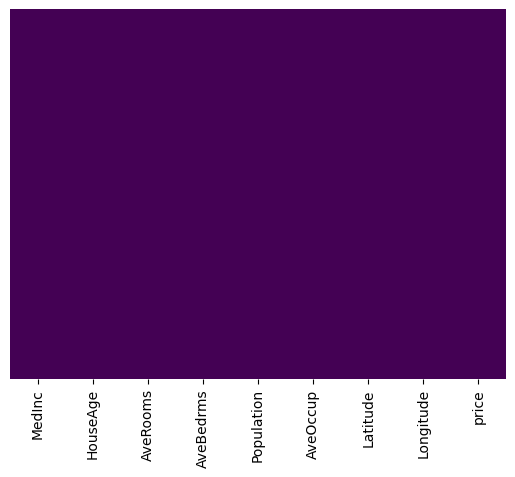

In [6]:
# To check missing values
print("SUM : \n",df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")


In [7]:
X_data = df.drop(["price"], axis=1).values
y_data = df["price"].values
print("X_data : ",X_data.shape," y_data : ",y_data.shape)

X_data :  (20640, 8)  y_data :  (20640,)


In [8]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_data)
X_sts = scaler.transform(X_data)

In [9]:
# Split into Input and Output Elements
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X_sts, 
              y_data, test_size= 0.20, random_state=100)
# Val set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full
                                                      , test_size= 0.10)

print("X_train  = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test   = ",X_test.shape ," y_test = ", y_test.shape)
print("X_valid  = ",X_valid.shape ," y_valid = ", y_valid.shape)


X_train  =  (14860, 8)  y_train =  (14860,)
X_test   =  (4128, 8)  y_test =  (4128,)
X_valid  =  (1652, 8)  y_valid =  (1652,)


# **Normal CNN**

## Activation function 
- tf.keras.activations.relu
- tf.keras.activations.leaky_relu
- tf.keras.activations.sigmoid
- tf.keras.activations.softmax
- tf.keras.activations.linear
- tf.keras.activations.softplus
- tf.keras.activations.softsign
- tf.keras.activations.tanh
- tf.keras.activations.exponential
- tf.keras.activations.swish
- tf.keras.activations.gelu
- tf.keras.activations.hard_sigmoid
- tf.keras.activations.hard_silu
- tf.keras.activations.selu
- tf.keras.activations.

In [12]:
type(X_train.shape[1:])

tuple

In [14]:
# Creating the model using the Sequential API
import tenorflow as tf
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation="relu", input_shape = X_train.shape[1:]))  # input_dim = 8
model.add(keras.layers.Dense(25, activation="relu"))
model.add(keras.layers.Dense(25, activation="relu"))
model.add(keras.layers.Dense(25, activation="relu"))
model.add(keras.layers.Dense(25, activation="relu"))
model.add(keras.layers.Dense(8, activation="relu"))
model.add(keras.layers.Dense(1, activation="relu")) # price > 0, so, relu

# The model’s summary() method displays all the model’s layers
print(model.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 100)                 │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 25)                  │           2,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 8)                   │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,592 (21.84 KB)

 Trainable params: 5,592 (21.84 KB)

 Non-trainable params: 0 (0.00 B)

None


## Optimization
- tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07) || "Adam"
- tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False) || "RMSprop"
- tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.01) || "AdamW"
- tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False) || "SGD"
- tf.keras.optimizers.Adagrad(learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07) || "Adagrad"
- tf.keras.optimizers.Adadelta(learning_rate=0.001, rho=0.95, epsilon=1e-07) || "Adadelta"
- tf.keras.optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-07) || "Adamax"
- tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07) || "Nadam"






## Loss Function
**Regression** 
- tf.keras.losses.MeanSquaredError() || "mse" or "mean_squared_error"
- tf.keras.losses.MeanAbsoluteError() || "mae" or "mean_absolute_error"

**Binary CLassification** 
- tf.keras.losses.BinaryCrossentropy() || "binary_crossentropy"

**Multi Classification** 
- tf.keras.losses.CategoricalCrossentropy() || "categorical_crossentropy"
- tf.keras.losses.SparseCategoricalCrossentropy() || "sparse_categorical_crossentropy"




## Metrics 
**Regression** 
- tf.keras.metrics.MeanSquaredError() || "mse" or "mean_squared_error"
- tf.keras.metrics.MeanAbsoluteError() || "mae" or "mean_absolute_error"

**Classification** 
- tf.keras.metrics.Accuracy() || "accuracy" or "acc"
- tf.keras.metrics.Precision() || "precision"
- tf.keras.metrics.Recall() || "recall"
- tf.keras.metrics.AUC() || "auc"


In [17]:
# Compiling the model
# https://keras.io/models/sequential/
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=["mae"])

## Train Model
**history = model.fit(X_train, y_train,**

**epochs=150,**

**steps_per_epoch=,**

**batch_size=64,**

**shuffle=True,**

**validation_data=(X_valid,y_valid) or validation_split=0 :1,**

**validation_batch_size=,**

**validation_steps=)**


In [16]:
# Training and evaluating the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_valid, y_valid))
# history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2)


Epoch 1/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1399 - mae: 1.0833 - val_loss: 0.6057 - val_mae: 0.5543
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5316 - mae: 0.5355 - val_loss: 0.5446 - val_mae: 0.5464
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4794 - mae: 0.5068 - val_loss: 0.5142 - val_mae: 0.4924
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4473 - mae: 0.4852 - val_loss: 0.4550 - val_mae: 0.4811
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4204 - mae: 0.4664 - val_loss: 0.4373 - val_mae: 0.4716
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4010 - mae: 0.4531 - val_loss: 0.4376 - val_mae: 0.4705
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4025 - mae: 0.4538 - val_loss: 0.4223 - val_mae: 0.4433
Epoch 8/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3719 - mae: 0.4364 - val_loss: 0.4597 - val_mae: 0.4555
Epoch 9/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

In [18]:
history.history

{'loss': [1.1580027341842651,
  0.5223756432533264,
  0.4701094627380371,
  0.4331832528114319,
  0.40732333064079285,
  0.39330002665519714,
  0.3829917311668396,
  0.36963725090026855,
  0.36526378989219666,
  0.358552485704422,
  0.3527076542377472,
  0.34749314188957214,
  0.3456652760505676,
  0.34151729941368103,
  0.3425290286540985,
  0.3379838466644287,
  0.33172571659088135,
  0.3337406516075134,
  0.32744100689888,
  0.3286370635032654,
  0.3259516656398773,
  0.32102546095848083,
  0.3223339021205902,
  0.32273250818252563,
  0.31522923707962036,
  0.3177678883075714,
  0.3155396282672882,
  0.3141005039215088,
  0.31377071142196655,
  0.3061208128929138,
  0.3166416883468628,
  0.3092990219593048,
  0.30810368061065674,
  0.30884772539138794,
  0.30680516362190247,
  0.3039924204349518,
  0.2981433570384979,
  0.29884374141693115,
  0.2980998754501343,
  0.3034067749977112,
  0.29442980885505676,
  0.2910505533218384,
  0.30263179540634155,
  0.2947665750980377,
  0.287553

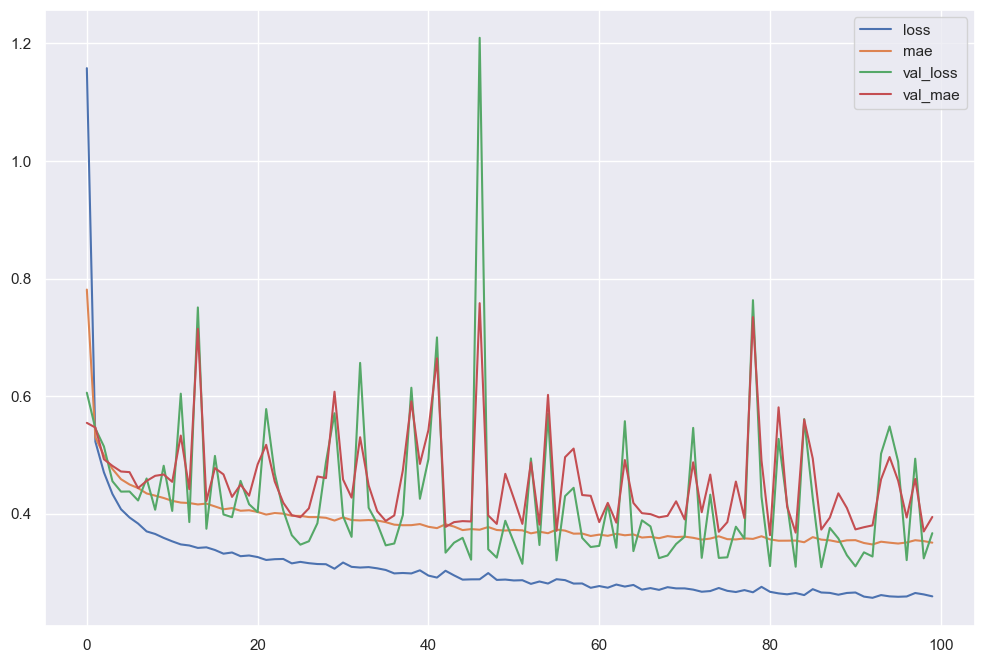

-----------------------------------------------------------------------
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.3126 - mae: 0.3739
Loss                   :  0.3208707869052887
Mean Absolute Error     :  0.3777902126312256


In [20]:
# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

print("-----------------------------------------------------------------------")
# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss                   : ",model_evaluate[0])
print("Mean Absolute Error     : ",model_evaluate[1])


In [21]:
# Comparison of the actual results with the predicted results
predicted = model.predict(X_test)

# Model evaluation
print("Mean Absolute Error    : ", metrics.mean_absolute_error(y_test, predicted))  
print("Mean Squared Error     : ", metrics.mean_squared_error(y_test, predicted))  
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print("r2_score               : ", metrics.r2_score(y_test, predicted))

print("-----------------------------------------------------------------------")
df_data = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": predicted.flatten()})
print(df_data.head(15))
print("-----------------------------------------------------------------------")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step
Mean Absolute Error    :  0.37779020247916384
Mean Squared Error     :  0.32087074574183533
Root Mean Squared Error:  0.5664545398722084
r2_score               :  0.7618588398686559
-----------------------------------------------------------------------
    Actual  Predicted
0    2.453   2.641944
1    1.042   1.311074
2    1.462   1.102720
3    1.542   0.966637
4    3.242   1.955078
5    1.411   1.452199
6    2.273   2.005802
7    2.023   2.101420
8    1.702   1.071161
9    3.018   2.646020
10   1.522   1.516186
11   3.081   2.903916
12   4.850   3.776604
13   1.625   1.548723
14   2.250   2.879057
-----------------------------------------------------------------------
